Final Project Submission

Please fill out:
* Student name: Ice Asortse
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


# Employee Retention 

## Introduction

Employee retention has been a very big issue in organizations for a long time. A lot of businesses and organizations have struggled in keeping their employees happy and satisfied. We will attempt to use data available to us to create a model that can predict employee attrition.

## Importing libraries and dataset

In [65]:
#!pip install imblearn --user

In [66]:
#!pip install -U matplotlib --user

In [67]:
# Importing the neccesarry libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [68]:
# Importing data from excelinto the notebook
df = pd.read_excel(r'C:\Users\Ice Asortse\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.xlsx')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Cleaning data and pre-processing data

In [69]:
# Checking for null or missing data
df.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [70]:
# Checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

As we can see, the data contains both categorical and numerical data types.

In [71]:
print("Shape of the dataframe is {}".format(df.shape))

Shape of the dataframe is (1470, 35)


EDA summary
1. There are no missing data 
2. Dataset has correct data types

In [72]:
#help(df.select_dtypes)

## Exploratory Data Analysis (EDA)

### Attrition

In [73]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [74]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df[df['Attrition'] == 'No'].shape[0] / df.shape[0]*100,
    df[df['Attrition'] == 'Yes'].shape[0] / df.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


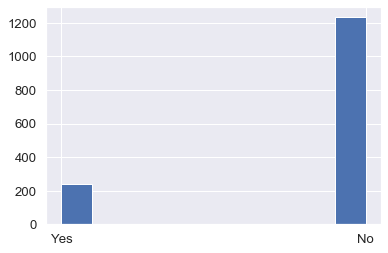

In [75]:
df['Attrition'].hist()

### Data Summary

In [76]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [77]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


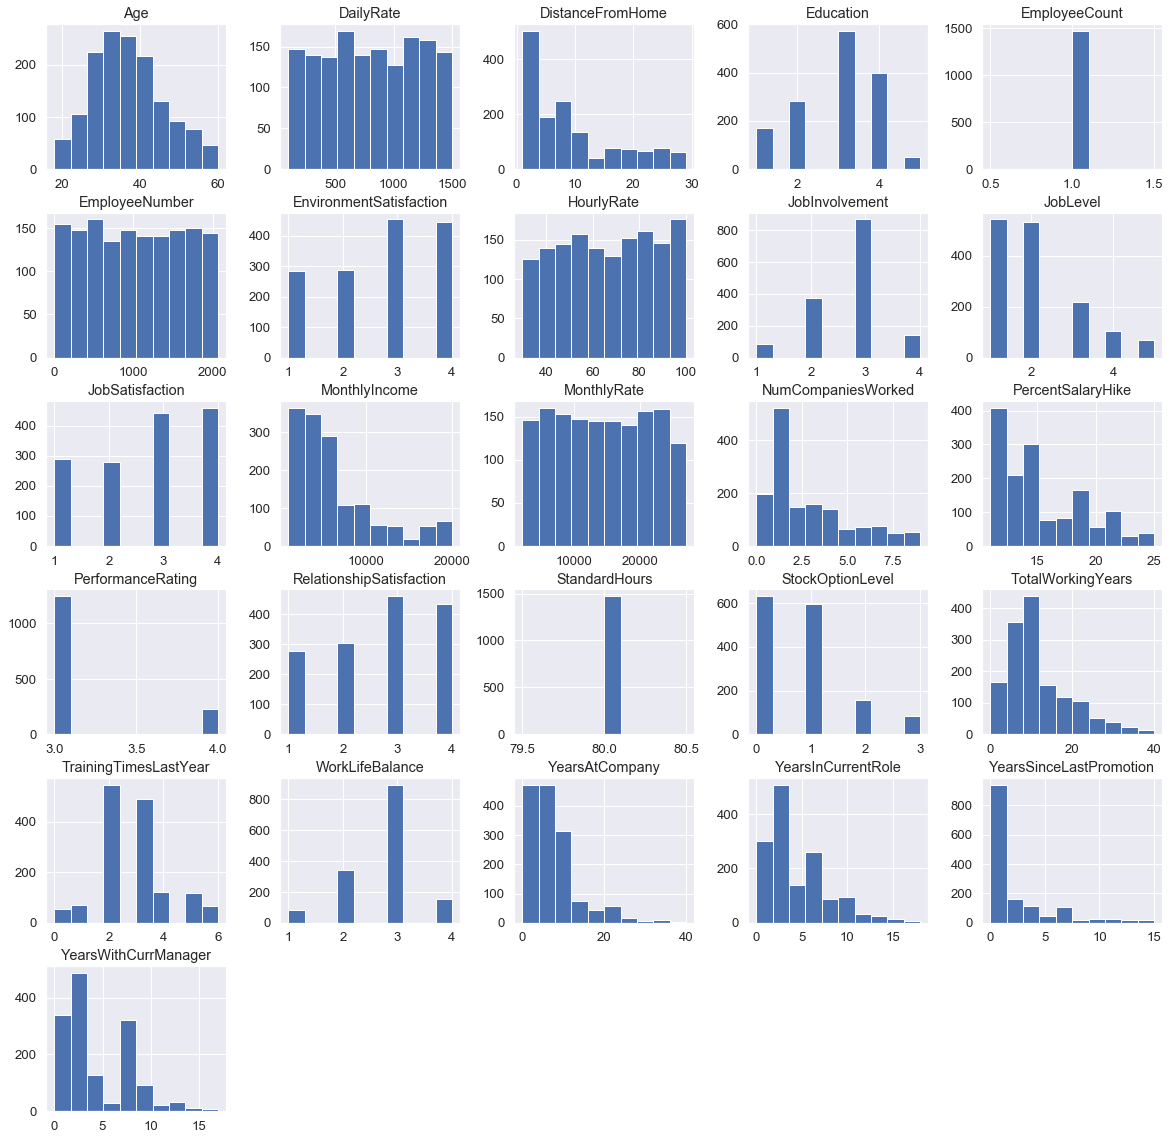

In [78]:
df.hist(figsize=(20,20))
plt.show()

Age distribution shows most of the employees are between 25 to 45 years old.
EmployeeCount and StandardHours are constant values for all employees.
EmployeeNumber is unique id for each employee.
Over18 is constant meaning working age starts from 18.

### Interaction between Attrition and other features

Correlation

In [79]:
df_corr = df.copy()
df_corr['Target'] = df_corr['Attrition'].apply(lambda x:0 if x == 'No' else 1)
df_corr = df_corr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_corr.corr()['Target'].sort_values()

print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


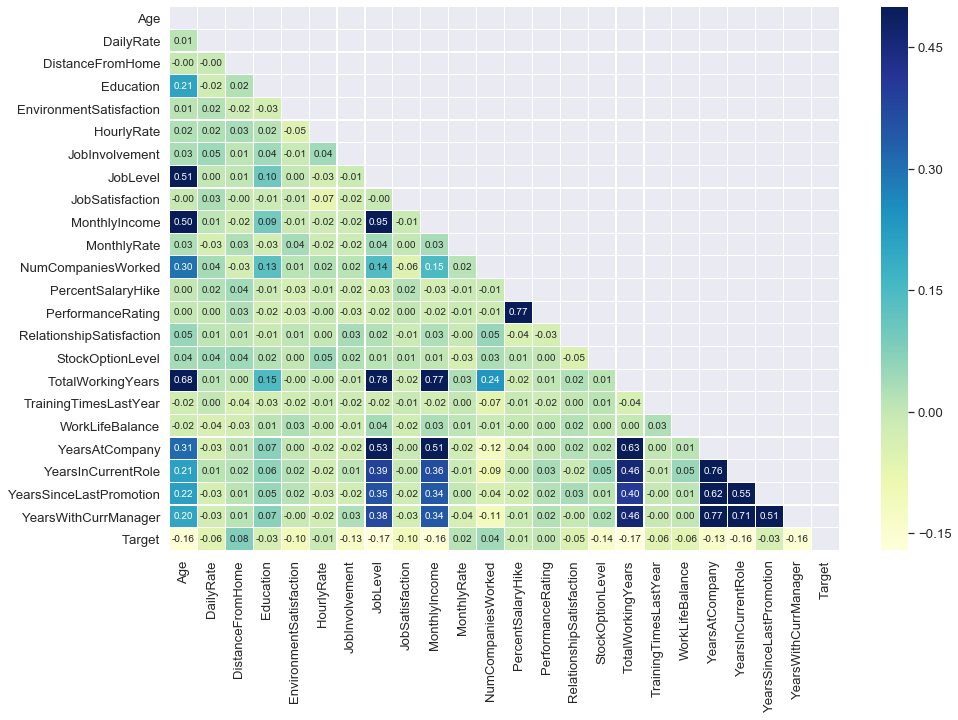

In [80]:
# Calculate correlations
corr = df_corr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,vmax=.5,mask=mask, annot=True, fmt='.2f', linewidths=.2, cmap="YlGnBu")

In [81]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']


In [82]:

df['Attrition'] = df.Attrition.astype("category").cat.codes
df['Attrition'].dtype

dtype('int8')

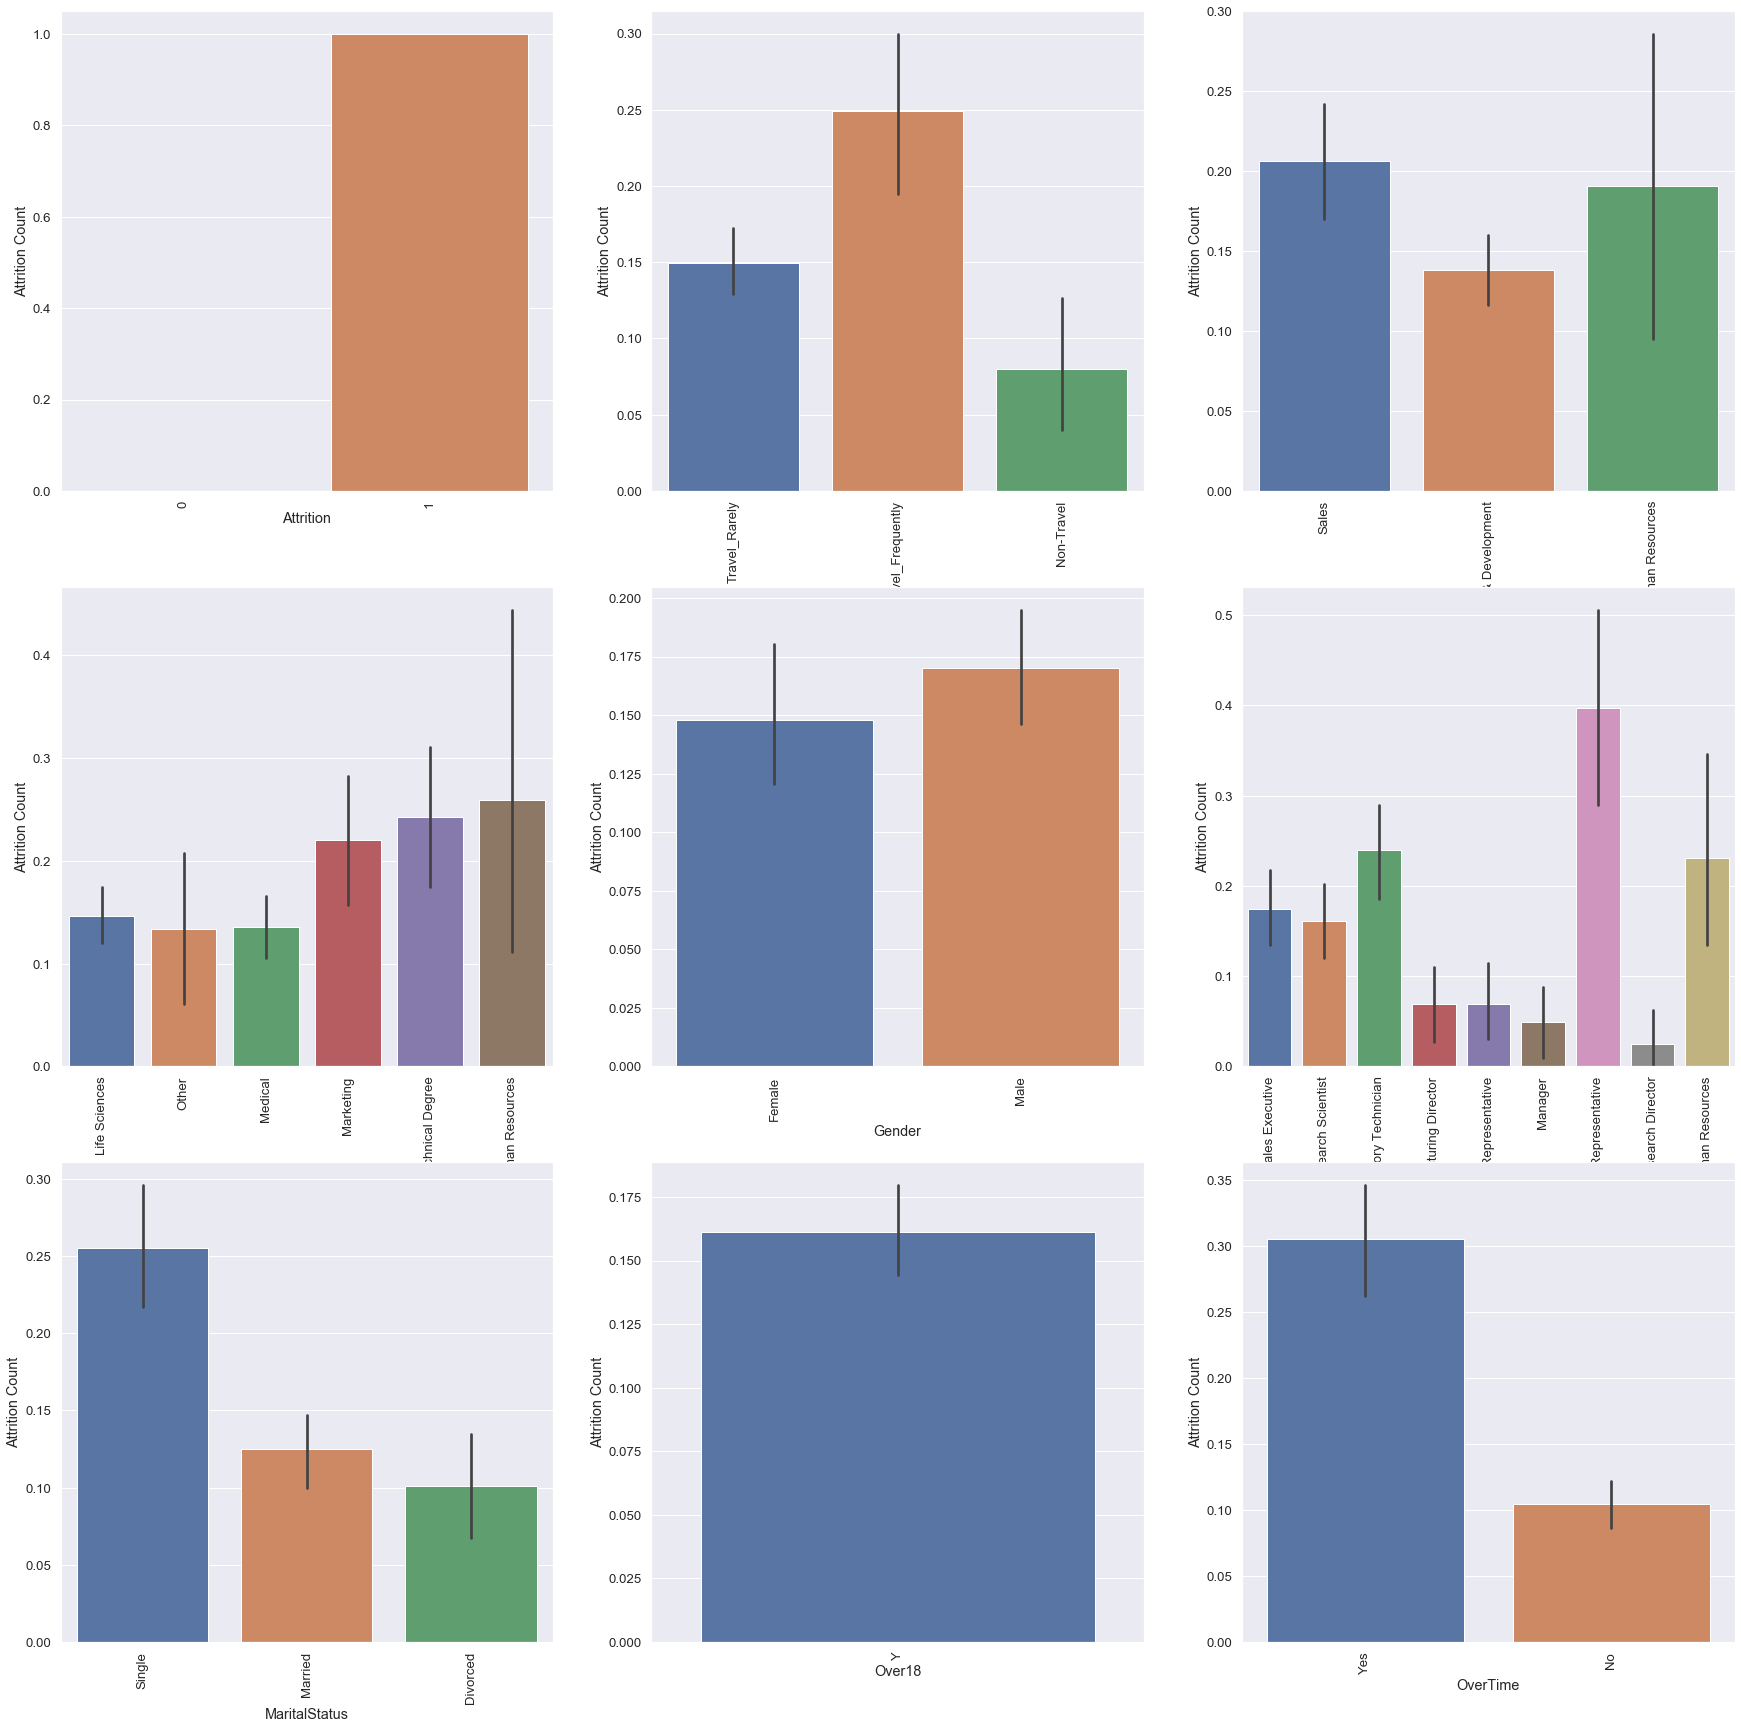

In [83]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

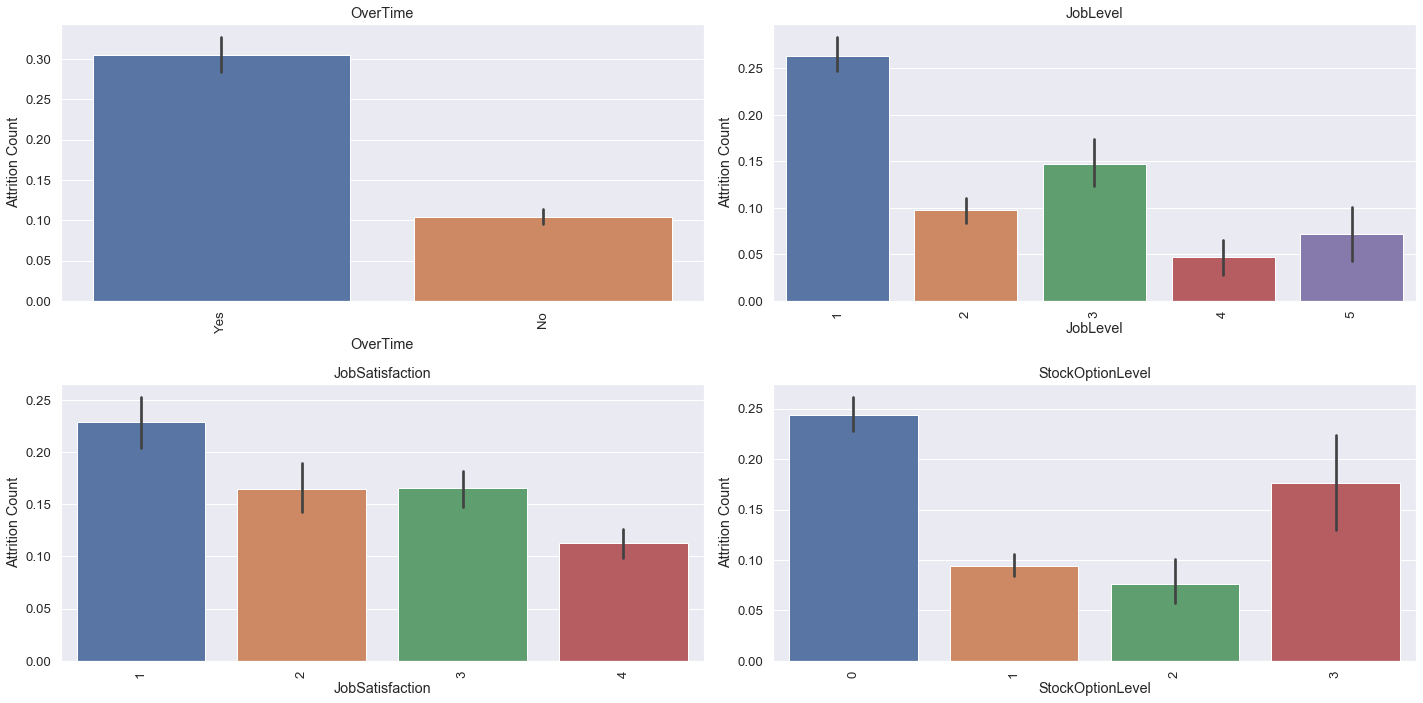

In [88]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 10))
best_cols = ['OverTime',
 'JobLevel',
 'JobSatisfaction',
 'StockOptionLevel']
for i, column in enumerate(best_cols, 1):
    plt.subplot(2, 2, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df, ci=68)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    #plt.xlabel(f'{column}')
    plt.title(column)
plt.tight_layout()

Interaction Summary

OverTime : The workers who work more hours are likely to quit then others.

Department : Employees in Research & Development are less likely to quit compared  employees in other department. 

BusinessTravel : Employees who travel more are  likely to quit conpared to other employees.

EducationField : Employees with Technical Degree and  Human Resources are less likely to stay compared to employees from other educational fileds.

JobRole : Employees in Human Resources, Laboratory Technician, Sales Representative are more likely to quit than employees in other positions.

Gender : Male employees are more likely to quit.

MaritalStatus : Single marital status employees are more likely to quit compared to  Married, and Divorced employees.

Some features are redundant for our analysis such as: EmployeeCount, EmployeeNumber, StandardHours, and Over18.

In [20]:
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## Encoding Categorical variables

In [21]:
# Selecting out categorical variables
cat_var = df.select_dtypes('object').columns
cat_var 

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df['Attrition'])

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [23]:
temp = le.fit_transform(df['Attrition'])

In [24]:
temp.dtype

dtype('int64')

In [25]:
le.inverse_transform(temp)

array([1, 0, 1, ..., 0, 0, 0], dtype=int8)

In [26]:
Encoders= {}
for col in cat_var:
    le = LabelEncoder()
    temp = le.fit_transform(df[col])
    df[col] = temp
    Encoders[col] = le
    

In [27]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [28]:
# Encoders['Attrition'].inverse_transform(df['Attrition'])

In [29]:
print('Size of Full Encoded Dataset: {}'. format(df.shape))

Size of Full Encoded Dataset: (1470, 31)


In [30]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 3))
df_col = list(df.columns)
df_col

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [33]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 3))
df_col = list(df.columns)
df_col.remove('Attrition')
for col in df_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['Attrition'] = pd.to_numeric(df['Attrition'], downcast='float')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.642857,1,3.0,2.147459,3.0,0.000000,0.75,0.6,1.0,0.0,...,0.0,0.0,0.0,0.600,0.0,0.0,0.45,0.666667,0.0,0.882353
1,2.214286,0,1.5,0.380100,1.5,0.750000,0.00,0.6,2.0,3.0,...,3.0,3.0,1.0,0.750,1.5,2.0,0.75,1.166667,0.2,1.235294
2,1.357143,1,3.0,2.729420,1.5,0.107143,0.75,2.4,3.0,3.0,...,0.0,1.0,0.0,0.525,1.5,2.0,0.00,0.000000,0.0,0.000000
3,1.071429,0,1.5,2.770222,1.5,0.214286,2.25,0.6,3.0,0.0,...,0.0,2.0,0.0,0.600,1.5,2.0,0.60,1.166667,0.6,0.000000
4,0.642857,0,3.0,1.050107,1.5,0.107143,0.00,1.8,0.0,3.0,...,0.0,3.0,1.0,0.450,1.5,2.0,0.15,0.333333,0.4,0.352941


## Splitting data into training and testing sets

In [34]:
target = df['Attrition'].copy()
type(target)

pandas.core.series.Series

In [35]:
df.drop(['Attrition'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df.shape))

Size of Full dataset is: (1470, 30)


In [36]:
# we have a heavy imbalance of class( we have more employesss with 0 than 1)


X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=24) #stratify=target) 

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

pd.Series(y_train).value_counts()

Number transactions X_train dataset:  (1102, 30)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 30)
Number transactions y_test dataset:  (368,)


0    930
1    172
Name: Attrition, dtype: int64

In [37]:
target.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [38]:
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)
#X_train = pd.DataFrame(X_train, columns=df.columns)
#y_train = pd.Series(y_train, name=y_test.name)
pd.Series(y_train).value_counts()

1    930
0    930
Name: Attrition, dtype: int64

## Building Machine Learning Model

### Random Forest

In [39]:
#
param_grid = {'max_depth':[3, None], 'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 10], 'bootstrap':[True, False], 
              'criterion':["gini", "entropy"]}

rand_frst_clf = RandomForestClassifier(random_state=42, n_estimators=1000)

grid_rand_forest = GridSearchCV(rand_frst_clf, param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)

In [40]:
grid_rand_forest.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 15.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1000, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [48]:
rf_opt = grid_rand_forest.best_estimator_.get_params
rf_opt

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>

In [49]:
y_train_pred = grid_rand_forest.predict(X_train)
y_test_pred = grid_rand_forest.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(f"========Train data============ :\n=>Accuracy Score {accuracy_score(y_train, y_train_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_train, y_train_pred)}")

print(f"=========test data============ :\nAccuracy Score {accuracy_score(y_test, y_test_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")

========Train data============ :
=>Accuracy Score 1.0
=>Confusion Matrix :
[[930   0]
 [  0 930]]
=========test data============ :
Accuracy Score 0.8369565217391305
=>Confusion Matrix :
[[295   8]
 [ 52  13]]


### SVM

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
svm_model = SVC(kernel='linear', gamma='auto', C=1.0)
pipeline = Pipeline([("svm_model", SVC(kernel='linear', gamma='auto', C=1.0))])
params = {"svm_model__C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "svm_model__gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "svm_model__kernel":('linear', 'poly', 'rbf')}

svm_grid = GridSearchCV(pipeline, params, n_jobs=-1, cv=3, verbose=1, scoring="accuracy", iid=True)

In [57]:
svm_grid.fit(X_train, y_train)

Fitting 3 folds for each of 147 candidates, totalling 441 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:  3.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('svm_model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid=True, n_jobs=-1,
             param_grid={'svm_model__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'svm_model__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75

In [58]:
y_train_pred = svm_grid.predict(X_train)
y_test_pred = svm_grid.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(f"========Train data============ :\n=>Accuracy Score {accuracy_score(y_train, y_train_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_train, y_train_pred)}")

print(f"=========test data============ :\nAccuracy Score {accuracy_score(y_test, y_test_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")

========Train data============ :
=>Accuracy Score 1.0
=>Confusion Matrix :
[[930   0]
 [  0 930]]
=========test data============ :
Accuracy Score 0.8260869565217391
=>Confusion Matrix :
[[303   0]
 [ 64   1]]


In [60]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_clf = GradientBoostingClassifier()
gbm_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [61]:
y_train_pred = gbm_clf.predict(X_train)
y_test_pred = gbm_clf.predict(X_test)

In [62]:
print(f"========Train data============ :\n=>Accuracy Score {accuracy_score(y_train, y_train_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_train, y_train_pred)}")

print(f"=========test data============ :\nAccuracy Score {accuracy_score(y_test, y_test_pred)}")
print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")

========Train data============ :
=>Accuracy Score 0.975268817204301
=>Confusion Matrix :
[[925   5]
 [ 41 889]]
=========test data============ :
Accuracy Score 0.8478260869565217
=>Confusion Matrix :
[[295   8]
 [ 48  17]]
